<a href="https://colab.research.google.com/github/jisoolee11/Tensorflow/blob/main/machine_learning/4_training_linear_models_w6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CHAPTER 4.모델 훈련

## 선형 회귀

### 정규 방정식

In [ ]:
# 정규방정식을 테스트하기 위한 선형 데이터 생성
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1) 

In [ ]:
# inv()함수: 역행렬 계산, dot()메서드: 행렬 곱셈
X_b = np.c_[np.ones((100, 1)), X] # 모든 샘플에 x0 = 1을 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)  # 정규 방정식
theta_best # 정규방정식으로 계산한 값 확인

array([[4.10481097],
       [3.01303506]])

In [ ]:
# 비용함수를 최소화하는 세타값(세타 햇)을 사용해  예측
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # 모든 샘플에 x0 = 1을 추가
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.10481097],
       [10.1308811 ]])

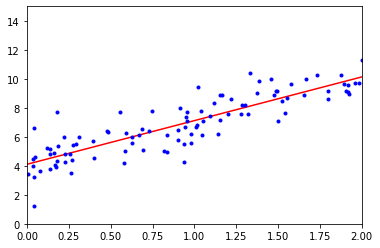

In [ ]:
# 그래프 그리기
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [ ]:
# sklearn을 이용한 선형 회귀
# 좀 더 빠르고 간단하다
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.10481097]), array([[3.01303506]]))

In [ ]:
lin_reg.predict(X_new)

array([[ 4.10481097],
       [10.1308811 ]])

In [ ]:
# scipy.linalg.lstsq()함수(최소 제곱) 호출
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.10481097],
       [3.01303506]])

In [ ]:
# np.linalg.pinv()함수를 사용해 유사역행렬 구하기
np.linalg.pinv(X_b).dot(y)

array([[4.10481097],
       [3.01303506]])

## 경사 하강법

### 배치 경사 하강법

In [ ]:
# 내려가는 스텝의 크기를 결정하기 위해 그레이디언트 벡터에 학습률을 곱한다
eta = 0.1 # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # 무작위 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [ ]:
theta

array([[4.10481097],
       [3.01303506]])

### 확률적 경사 하강법

In [ ]:
# 간단한 학습 스케줄을 사용한 확률적 경사 하강법 구현
n_epochs = 50
t0, t1 = 5, 50 # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1) # 무작위 초기화

for epoch in range(n_epochs): # 1epoch: 트레이닝 데이터를 한 번 본다. 
    for i in range(m): # m: 트레이닝 데이터의 갯수
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 *xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i) # eta를 함수로 가져온다
        theta = theta - eta * gradients # 새로운 세타 계산

In [ ]:
theta

array([[4.0521244 ],
       [2.93175126]])

In [ ]:
# sklearn의 SGDGegressor 클래스 사용: 기본값으로 제곱 오차 비용 함수를 최적화
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
# 최대 1000번 에포크 동안 실행, 한 에포크에서 0.001보타 적게 손실이 줄어들 때까지 실행, 학습률 0.1 규제 사용하지 않음
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([4.07970748]), array([3.00936228]))

## 다항 회귀

In [ ]:
import numpy.random as rnd

# 랜덤값 고정
np.random.seed(42)

In [ ]:
# 간단한 2차방정식으로 비선형 데이터 생성
m = 100
X = 6 *np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [ ]:
# sklearn의 PolynomialFeatures를 사용해 훈련 데이터를 변환
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [ ]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [ ]:
# LinearRegression 적용해보기
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

## 학습 곡선

In [ ]:
# 훈련 데이터에서 모델의 학습 곡선을 그리는 함수 정의 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train_set")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val_set")

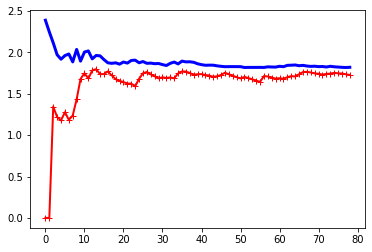

In [ ]:
# 단순 선형 회구 모델의 학습 곡선
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

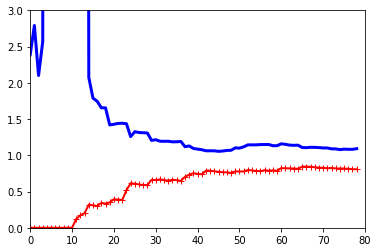

In [ ]:
# 같은 데이터에서 10차 다항 회귀 모델의 학습 곡선 그리기
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("Poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
plt.show()   

## 규제가 있는 선형 모델

### 릿지 회귀

In [ ]:
# 사이킷런에서 정규방정식을 사용한 릿지 회귀를 적용
# 규제가  추가된 선형 회귀 버전
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.82497007]])

In [ ]:
# 확률적 경사 하강법
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.80078479])

### 라쏘 회귀

In [ ]:
# Lasso 클래스를 사용
# 규제가  추가된 선형 회귀 버전
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.77621741])

### 엘라스틱넷

In [ ]:
# 사이킷런의 ElasticNet 사용
# 릿지와  라쏘 절충
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.78114505])

### 조기 종료

In [ ]:
# 조기 종료를 위한 기본 코드
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

# 데이터 준비

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5)
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)  
# warm_start=True로 지정하면 fit() 메서드가 호출될 때 처음부터 다시 시작하지 않고 이전 모델 파라미터에서 훈련을 이어간다.

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # 훈련을 이어서 진행
    y_vla_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_vla_predict)
    if val_error < minimum_val_error:
        minimum_val_error = minimum_val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

## 로지스틱 회귀

### 결정 경계

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [ ]:
X = iris["data"][:, 3:]  # 꽃잎의 너비
y = (iris["target"] == 2).astype(np.int)  # 1 Iris-Virginica면 1, 그렇지 않으면 0

In [ ]:
# 로지스틱 모델을 훈련시킵니다.
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

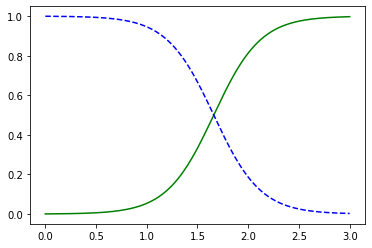

In [ ]:
# 꽃잎의 너비가 0~3cm인 꽃에 대해 모델의 추정 확률을 계산
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")

In [ ]:
# 꽃잎의 너비가 1.6cm보다 크면 분류기는 Iris-Verginica로 분류하고, 그보다 작으면 아니라고 예측
log_reg.predict([[1.7], [1.5]])

array([1, 0])

### 소프트맥스 회귀

In [ ]:
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)  # solver="lbfgs" 소프트맥스 회귀를 지원하는 알고리즘 지정
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# 꽃잎의 길이가 5cm, 너비가 2cm인 붓꽃을 발견했다고 가정하고 붓꽃의 품종 클래스 예측
softmax_reg.predict([[5, 2]])

array([2])

In [ ]:
# 꽃잎의 길이가 5cm, 너비가 2cm인 붓꽃을 발견했다고 가정하고 붓꽃의 품종 확률 예측
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])